In [32]:
import pandas as pd
import glob
import os
import numpy as np

In [128]:
region_dict = {
 0: 'Agua Boa',
 1: 'Barra do Garcas',
 2: 'Canarana',
 3: 'Nova Xavantina',
 4: 'Querencia'
}
 

In [8]:
all_csvs = glob.glob('./out/*.csv')
all_csvs.sort()

In [21]:
def read_process_csv(csv):
    temp_df = pd.read_csv(csv)
    temp_df['satellite'] = os.path.basename(csv)[:3]
    temp_df['year'] = os.path.basename(csv)[4:8]
    return temp_df

In [23]:
full_df = pd.concat([
    read_process_csv(csv) for csv in all_csvs
])

In [138]:
# Remove Agua Boa
full_df = full_df.loc[full_df['reg']!=0]

In [150]:
groupby_reg = full_df.groupby(['satellite', 'year', 'reg']).agg([
    'min','max','mean','median','sum','count'
])['area']

In [151]:
groupby_noreg = full_df.drop(columns=['reg']).groupby(['satellite', 'year']).agg([
    'max','mean','median','sum','count'
])['area']

<AxesSubplot: xlabel='satellite,year'>

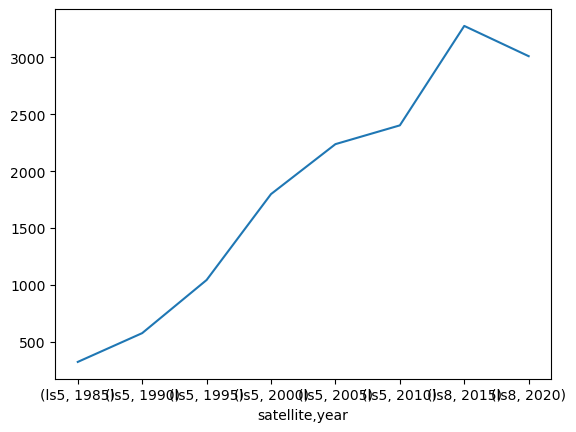

In [152]:
groupby_noreg.loc[['ls5', 'ls8']][('count')].plot()

<AxesSubplot: xlabel='satellite,year'>

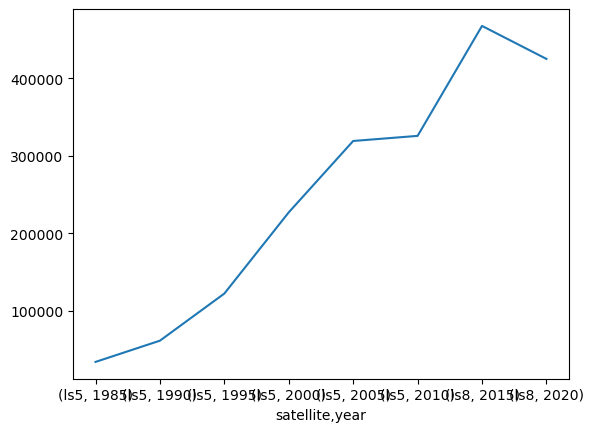

In [153]:
groupby_noreg.loc[['ls5', 'ls8']][('sum')].plot()

In [154]:
groupby_reg_nols7 = groupby_reg.loc[['ls5', 'ls8']]
groupby_reg_nols7['reg'] = groupby_reg_nols7.index.get_level_values(2)

In [155]:
all_reg_sum_vals = [groupby_reg_nols7[groupby_reg_nols7['reg']==i][('sum')].values for i in range(5)]
all_reg_count_vals = [groupby_reg_nols7[groupby_reg_nols7['reg']==i][('count')].values for i in range(5)]

In [156]:
groupby_reg_sum= pd.DataFrame({
    'year': groupby_reg_nols7.index.get_level_values(1).unique(),
})
for i in range(1, 5):
    groupby_reg_sum[region_dict[i]] = all_reg_sum_vals[i]

<AxesSubplot: xlabel='year'>

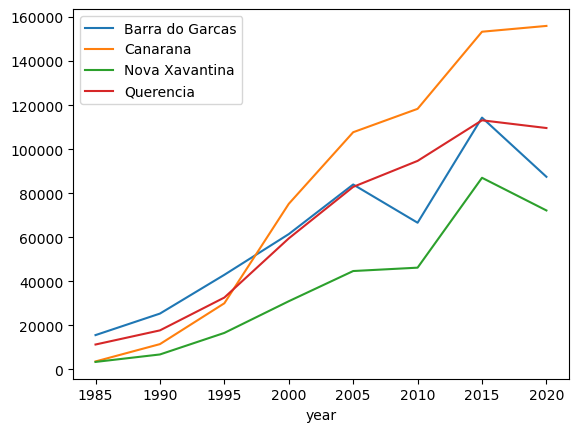

In [162]:
groupby_reg_sum.plot(x='year')

<AxesSubplot: xlabel='year'>

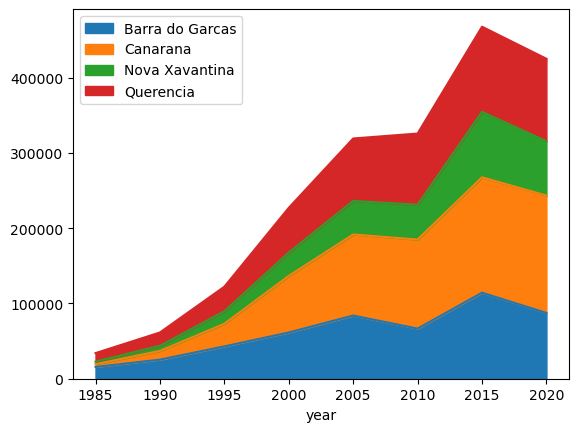

In [157]:
groupby_reg_sum.plot.area(x='year')

In [159]:
groupby_reg_count = pd.DataFrame({
    'year': groupby_reg_nols7.index.get_level_values(1).unique(),
})
for i in range(1, 5):
    groupby_reg_count[region_dict[i]] = all_reg_count_vals[i]

<AxesSubplot: xlabel='year'>

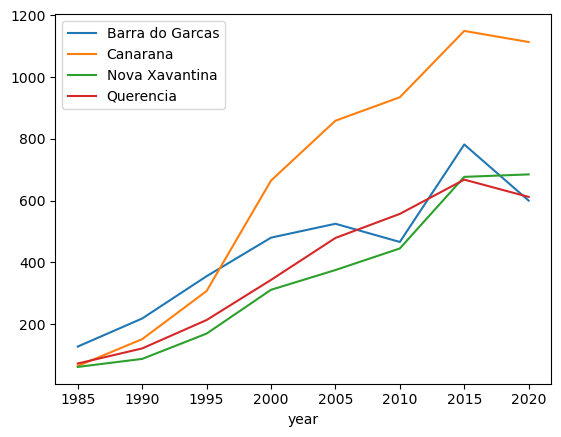

In [160]:
groupby_reg_count.plot(x='year')

<AxesSubplot: xlabel='year'>

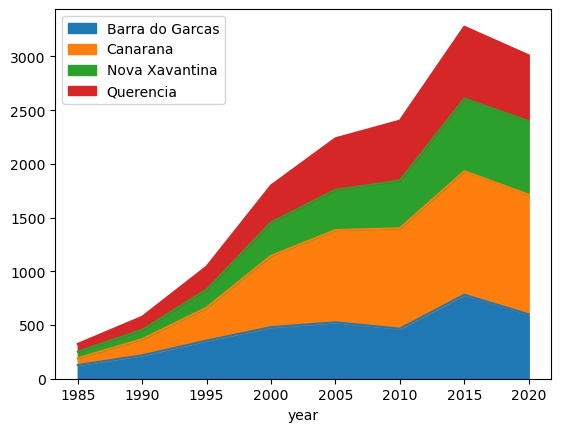

In [161]:
groupby_reg_count.plot.area(x='year')